# Homework 1
This homework consists of three parts, each of which is rated at 10 points:
* Numpy (10 points)
* Matplotlib (10 points)
* Linear Regression (10 points)

The score for each task is described in the comments before the task.

The task is performed independently, otherwise all those involved will receive 0 points :) If you have found a solution to any of the tasks (or part of it) in an open source, you must specify a link to this source in a separate block at the end of your work. Otherwise, **the work will also be rated at 0 points**.

**Deadline: FILL_THE_GAP**

## Part 1. Numpy
It is forbidden to use **while**, **for**, **if** in this part. All operations must be performed in numpy calculation. Recall that using, for example, max instead of np.max is also a suboptimal step. The solution will be counted if it satisfies the conditions above and passes asserts.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [45]:
# task 1 (1 point)

"""
description: finds the maximum element in the vector among the elements preceded by zero
input: np.array([0, 2, 0, 3])
output: 3
"""
def max_after_zero(x: np.array) -> int:
    ans = x[x == np.diff(x, prepend=1)]
    return np.max(ans)

In [46]:
x = np.array([0, 1, 2, 0, 6, 0, 10, 0])
assert max_after_zero(x) == 10
print("OK")

OK


/tmp/ipykernel_195751/2153744358.py:16: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  img = plt.imread('https://i.kym-cdn.com/photos/images/facebook/001/944/057/a86.jpg', 'jpg')


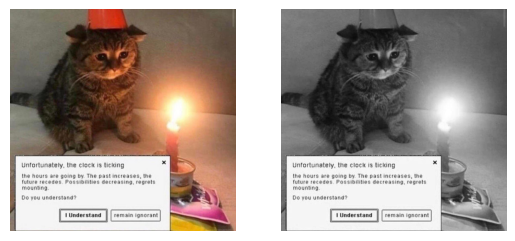

In [67]:
# task 2 (1 point)

"""
description: given an image (height, width, numChannels) and weights (numChannels)
Sums the image channels with the specified weights and return the result as
a size matrix (height, width).

Give an example of how the function works – convert a color image to shades of 
gray using np.array coefficients([0.299, 0.587, 0.114]). 
Take a cool picture for the joy of the assistant and draw it 
before and after the transformation.
"""
def grayscale(img: np.array, weights: np.array) -> np.array:
    return img @ weights
    
img = plt.imread('https://i.kym-cdn.com/photos/images/facebook/001/944/057/a86.jpg', 'jpg')
fig, axs = plt.subplots(1,2)

axs[0].imshow(img)
axs[0].axis('off')

img_gray = grayscale(img, [0.299, 0.587, 0.114])

axs[1].imshow(img_gray, cmap='gray')
axs[1].axis('off')

plt.show()

In [48]:
img = np.arange(1*2*3).reshape(1, 2, 3)
weights = np.array([0.299, 0.587, 0.114])
res = np.array([[ 0.815,  3.815]])
assert np.allclose(grayscale(img, weights), res)
print("OK")

OK


In [49]:
# task 3 (2 points)

"""
description: makes up a block matrix of four
blocks, where each block is a given matrix
"""
def block_matrix(block: np.array) -> np.array:
    ans = np.block(
        [[block, block],
        [block, block]]
        )
    return ans

In [50]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)
print("OK")

OK


In [51]:
# task 4 (2 points)

"""
description: calculates the product of all
nonzero diagonal elements of a square matrix
"""
def diag_prod(matrix: np.array) -> int:
    diag = np.diag(matrix)
    return np.prod(diag, where=(diag!=0))

In [10]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750
print("OK")

OK


In [11]:
# task 5 (2 points)

"""
description: this class implements StandardScaler from the sklearn library
As input, the fit method accepts a matrix where the signs are arranged in
columns, the fit method must remember mu and sigma for each of the signs,
and the transform must normalize the matrix with the pre-calculated mu and sigma.
"""
class StandardScaler:
    def fit(self, X: np.array):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
    
    def transform(self, X: np.array) -> np.array:
        return (X-self.mean)/self.std

In [12]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
scaler = StandardScaler()

scaler.fit(matrix)

assert np.allclose(
    scaler.transform(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)
print("OK")

OK


In [58]:
# task 6 (2 points)

"""
description: calculates the antiderivative polynomial (take 42 as a constant)
for example, an array of coefficients [6, 0, 1] corresponds to 6x^2 + 1
"""
def antiderivative(coefs: np.array) -> np.array:
    reverse_index = np.arange(len(coefs), 1, -1) 
    almost_answer = np.divide(coefs[:-1], reverse_index)
    return np.hstack([almost_answer, coefs[-1], 42])

In [59]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 42.])
)
print("OK")

OK


In [60]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 42.])
)
print("OK")

OK


## Part 2. Matplotlib

### Task 1 (5 points)
Generate a Gaussian vector of dimension 2 from 100 points (choose mu and sigma on your choice). Check [the three sigma rule](https://en.wikipedia.org/wiki/68-95-99.7_rule): draw a circle centered in mu with a radius such that 0.99 of all points fall there, also draw a circle with a radius of 3 sigma. Draw a point mu in a separate color.

Use subplot to draw histograms with 10 buckets for each dimension and draw a density graph along the histogram.

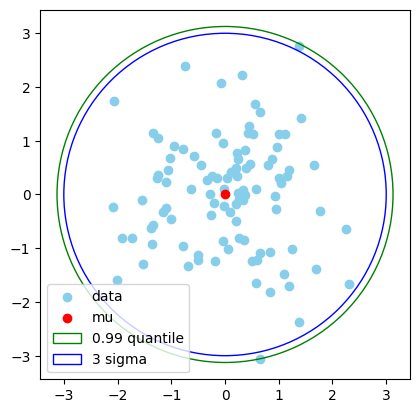

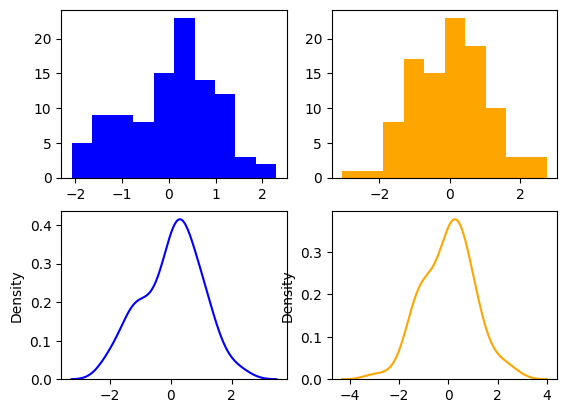

In [64]:
# Your code goes here
from matplotlib import gridspec
mu, sigma = 0, 1
np.random.seed(4242)
X = np.random.normal(loc=mu, scale=sigma, size=(2,100))

dists = np.sqrt((X[0,:]-mu)**2+(X[1,:]-mu)**2)
radius_X = 		np.quantile(dists, q=1)
radius_sigma = 	3*sigma

circle_X = 		plt.Circle(xy=(mu,mu), radius=radius_X, 	color='green', 	fill=None)
circle_sigma = 	plt.Circle(xy=(mu,mu), radius=radius_sigma, color='blue',	fill=None)

fig, ax = plt.subplots()

ax.scatter(X[0,:], X[1,:], color='skyblue')
ax.scatter(mu,mu,color='red')
ax.add_patch(circle_X)
ax.add_patch(circle_sigma)

limits = (-radius_sigma*1.3, radius_sigma*1.3)
ax.axis('scaled')
ax.legend(['data', 'mu','0.99 quantile', '3 sigma'])

plt.show()

fig, axs = plt.subplots(2,2)
axs[0,0].hist(X[0,:], bins=10, color='blue')
axs[0,1].hist(X[1,:], bins=10, color='orange')
from seaborn import kdeplot
kdeplot(X[0,:], ax=axs[1,0], color='blue')
kdeplot(X[1,:], ax=axs[1,1], color='orange')

plt.show()

### Task 2 (5 points)

Upload the dataset from the last seminar [fischer's irises](https://ru.wikipedia.org/wiki/Ирисы_Фишера). Build a **heatmap** with correlations between features, rows and columns should be signed with feature names. It is important to use matplotlib. The positive correlation should be displayed in green, the reverse in red, and the absence of correlation in white. Make the plot big enough.

**Hint:** use plt.xticks, plt.yticks, plt.imshow, plt.colorbar

Also build the same heatmap using seaborn.heatmap

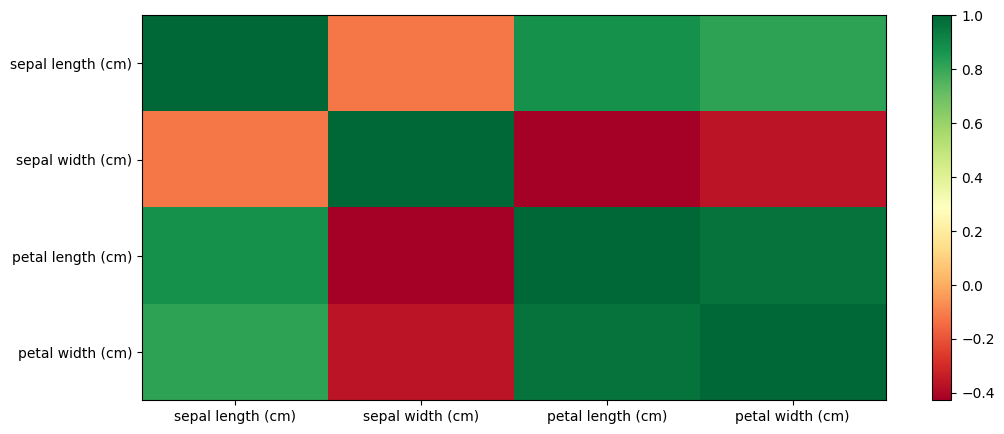

<function matplotlib.pyplot.show(close=None, block=None)>

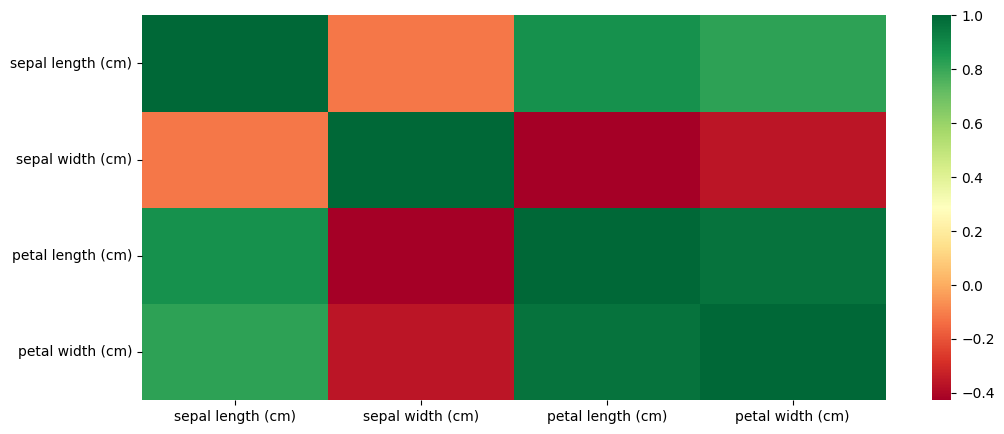

In [17]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)	

# Your code goes here
data_corr = iris['data'].corr()
fig = plt.figure(figsize=(12,5))
plt.imshow(data_corr, aspect='auto', cmap='RdYlGn', interpolation=None)

plt.colorbar()

cols = data_corr.columns
plt.xticks(range(len(cols)),cols)
plt.yticks(range(len(cols)),cols)

plt.show()

from seaborn import heatmap
fig2 = plt.figure(figsize=(12,5))
heatmap(data_corr, cmap='RdYlGn')
plt.show

## Part 3. Linear Regression
In this part, you need to implement a class with an analytical solution of linear regression and use all the skills you have acquired.

You are allowed to use any libraries: sklearn, numpy, matplotlib, scipy, etc.

Conclusions are needed for each step, only the code will be rated at 0 points

Load a dataset using np.loadtxt and split it into train and test

In [18]:
# !wget https://www.dropbox.com/s/kg9px9v3xfysak9/tutorial_dataset.csv

In [19]:
# Your code goes here
data = np.loadtxt('tutorial_dataset.csv', dtype=object, delimiter=',')[1:, :].astype(float) # no clue why did we need that

print(data[:,1].std()) # sigma=0, therefore not a real variable, because has only one value
data = np.delete(data, 1, 1)

df = pd.read_csv('tutorial_dataset.csv')
df = df.drop(columns='x0')
x, 			y = 		df.loc[:,['x1','x2','x3','x4']], df.y
x_test, 	y_test = 	x.iloc[:1800,:], y[:1800]
x_train, 	y_train = 	x.iloc[1800:,:], y[1800:]

0.0


Plot the dependence of the target on the features and distributions of features, correlations and and everything that you think is important **(2 points)**

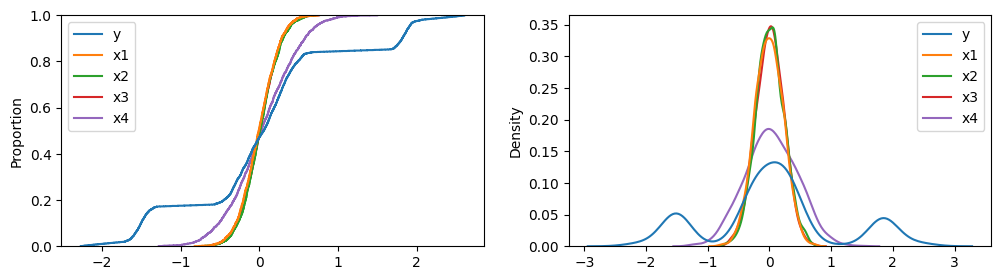

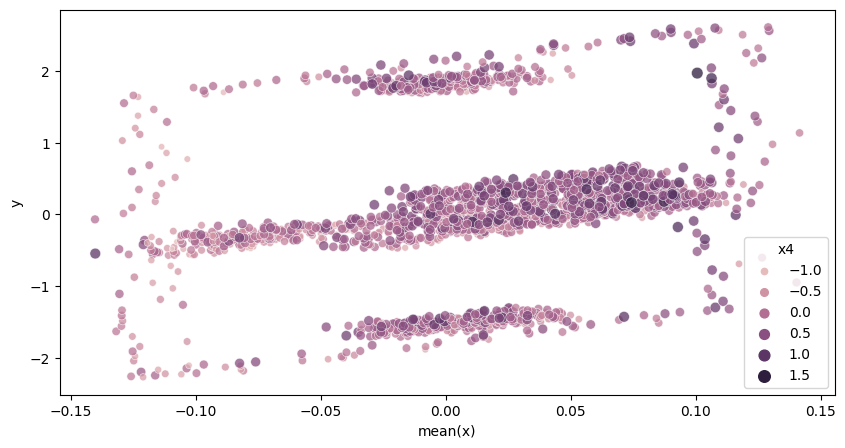

<Figure size 1500x500 with 0 Axes>

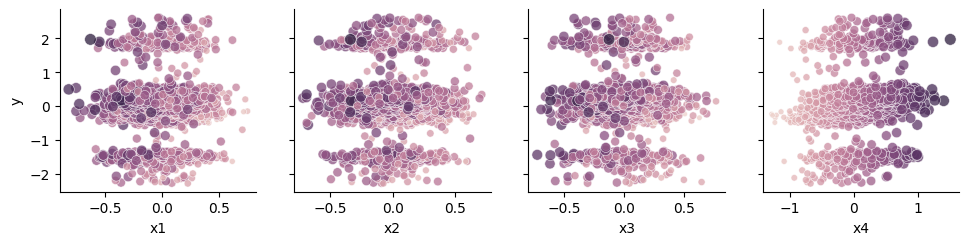

In [20]:
# Your code goes here
import seaborn as sns



fig, axs = plt.subplots(1,2, figsize=(12,3))

sns.ecdfplot(df, ax=axs[0])
sns.kdeplot(df, ax=axs[1])
plt.show()

fig = plt.figure(figsize=(10,5))
sns.scatterplot(x=x.mean(axis=1), y=y, hue=df.x4, size=x.x4, sizes=(15,70), alpha=0.75)
plt.xlabel('mean(x)')
plt.show()

fig = plt.figure(figsize=(15,5))
g = sns.PairGrid(df, x_vars=x.columns, y_vars=['y'], despine=True)
g.map_offdiag(sns.scatterplot, hue=x.x4, size=x.x4, sizes=(15,70), alpha=0.75, legend=False)
plt.show()


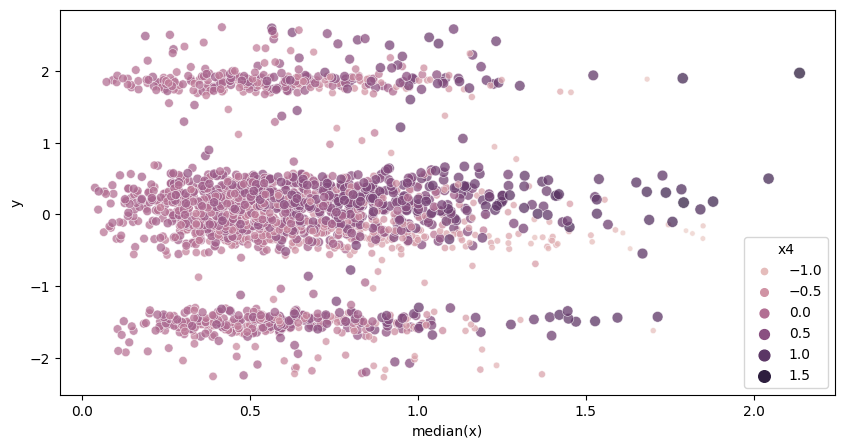

In [21]:
fig = plt.figure(figsize=(10,5))
sns.scatterplot(x=x.max(axis=1)-x.min(axis=1), y=y, hue=df.x4, size=x.x4, sizes=(15,70), alpha=0.75)
plt.xlabel('median(x)')
plt.show()

Implement a linear regression class, normalize features if needed and fit model **(2 points)**

In [22]:
class MyLinearRegression:
    def fit(self, X_train, y_train):
        X, Y = X_train, y_train
        self.w = np.array(np.linalg.inv(X.T @ X) @ X.T @ Y)[np.newaxis,:]
        self.w0 = Y.mean() - (X.mean(axis=0) @ self.w.T)[0]
    def predict(self, X_test):
        print(self.w0)
        return (X_test @ self.w.T)[0] + self.w0

reg = MyLinearRegression()
reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)
print(y_test.values - y_predict.values)

0.15710047713704803
[-0.34671128 -0.05018673 -0.33299101 ... -0.47692206 -0.2263994
 -0.03313082]


Try to come up with a way to understand which feature contributes more to your model **(3 points)**

In [23]:
# Your code goes here

Plot the dependence on the size of the training sample and the mse score **(1 point)**

In [24]:
# Your code goes here

Fit LinearRegression model from sklearn. Try to get the minimum MSE score as possible. Compare results with your model **(1 point)**

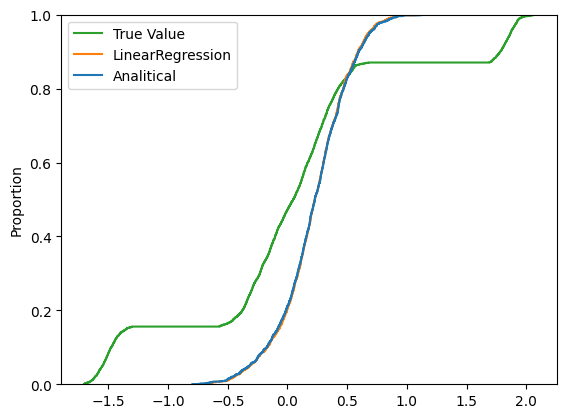

In [25]:
# Your code goes here
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_model = model.predict(x_test)
sns.ecdfplot([y_predict, y_model, y_test])
plt.legend(['Analitical','LinearRegression','True Value'][::-1])

Describe the challenges you had to face :) **(1 point)**

In [26]:
# Write here your thoughts